In [1]:

!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [2]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Loading data into dataframe

data = pd.read_csv("E:\\github\\PhishGuardAI\\url_features_labeled.csv")
data.head()

,UsingIp,longUrl,shortUrl,symbol,redirecting,prefixSuffix,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,Label
0,1,-1,1,1,1,1,0,1,-2,1,...,-1,-1,-2,-2,-2,-2,-2,-1,1,1
1,1,1,1,1,1,1,0,1,-2,-1,...,-1,-1,-2,-2,-2,-2,-2,-1,1,1
2,1,1,1,1,1,1,0,1,-2,-1,...,-1,-1,-2,-2,-2,-2,-2,0,1,1
3,1,1,1,1,1,-1,0,1,-2,-1,...,-1,-1,-2,-2,-2,-2,-2,-1,1,1
4,1,1,1,1,1,-1,0,1,-2,-1,...,-1,-1,-2,-2,-2,-2,-2,-1,1,1


In [5]:

data.shape

(54807, 31)

In [6]:
#Listing the features of the dataset

data.columns

Index(['UsingIp', 'longUrl', 'shortUrl', 'symbol', 'redirecting',
       'prefixSuffix', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'Label'],
      dtype='object')

In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54807 entries, 0 to 54806
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   UsingIp              54807 non-null  int64
 1   longUrl              54807 non-null  int64
 2   shortUrl             54807 non-null  int64
 3   symbol               54807 non-null  int64
 4   redirecting          54807 non-null  int64
 5   prefixSuffix         54807 non-null  int64
 6   SubDomains           54807 non-null  int64
 7   HTTPS                54807 non-null  int64
 8   DomainRegLen         54807 non-null  int64
 9   Favicon              54807 non-null  int64
 10  NonStdPort           54807 non-null  int64
 11  HTTPSDomainURL       54807 non-null  int64
 12  RequestURL           54807 non-null  int64
 13  AnchorURL            54807 non-null  int64
 14  LinksInScriptTags    54807 non-null  int64
 15  ServerFormHandler    54807 non-null  int64
 16  InfoEmail            5

In [8]:
data.nunique()

UsingIp                1
longUrl                3
shortUrl               2
symbol                 2
redirecting            2
prefixSuffix           2
SubDomains             3
HTTPS                  2
DomainRegLen           1
Favicon                2
NonStdPort             2
HTTPSDomainURL         2
RequestURL             3
AnchorURL              3
LinksInScriptTags      3
ServerFormHandler      3
InfoEmail              2
AbnormalURL            1
WebsiteForwarding      3
StatusBarCust          2
DisableRightClick      2
UsingPopupWindow       2
IframeRedirection      1
AgeofDomain            1
DNSRecording           1
WebsiteTraffic         1
PageRank               1
GoogleIndex            1
LinksPointingToPage    3
StatsReport            2
Label                  3
dtype: int64

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
UsingIp,54807.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
longUrl,54807.0,0.278742,0.890009,-1.0,-1.0,1.0,1.0,1.0
shortUrl,54807.0,0.926104,0.377271,-1.0,1.0,1.0,1.0,1.0
symbol,54807.0,0.974565,0.224106,-1.0,1.0,1.0,1.0,1.0
redirecting,54807.0,0.975806,0.218640,-1.0,1.0,1.0,1.0,1.0
prefixSuffix,54807.0,0.186345,0.982493,-1.0,-1.0,1.0,1.0,1.0
SubDomains,54807.0,0.037769,0.671189,-1.0,0.0,0.0,0.0,1.0
HTTPS,54807.0,0.790282,0.612749,-1.0,1.0,1.0,1.0,1.0
DomainRegLen,54807.0,-2.000000,0.000000,-2.0,-2.0,-2.0,-2.0,-2.0
Favicon,54807.0,-0.902275,0.431164,-1.0,-1.0,-1.0,-1.0,1.0


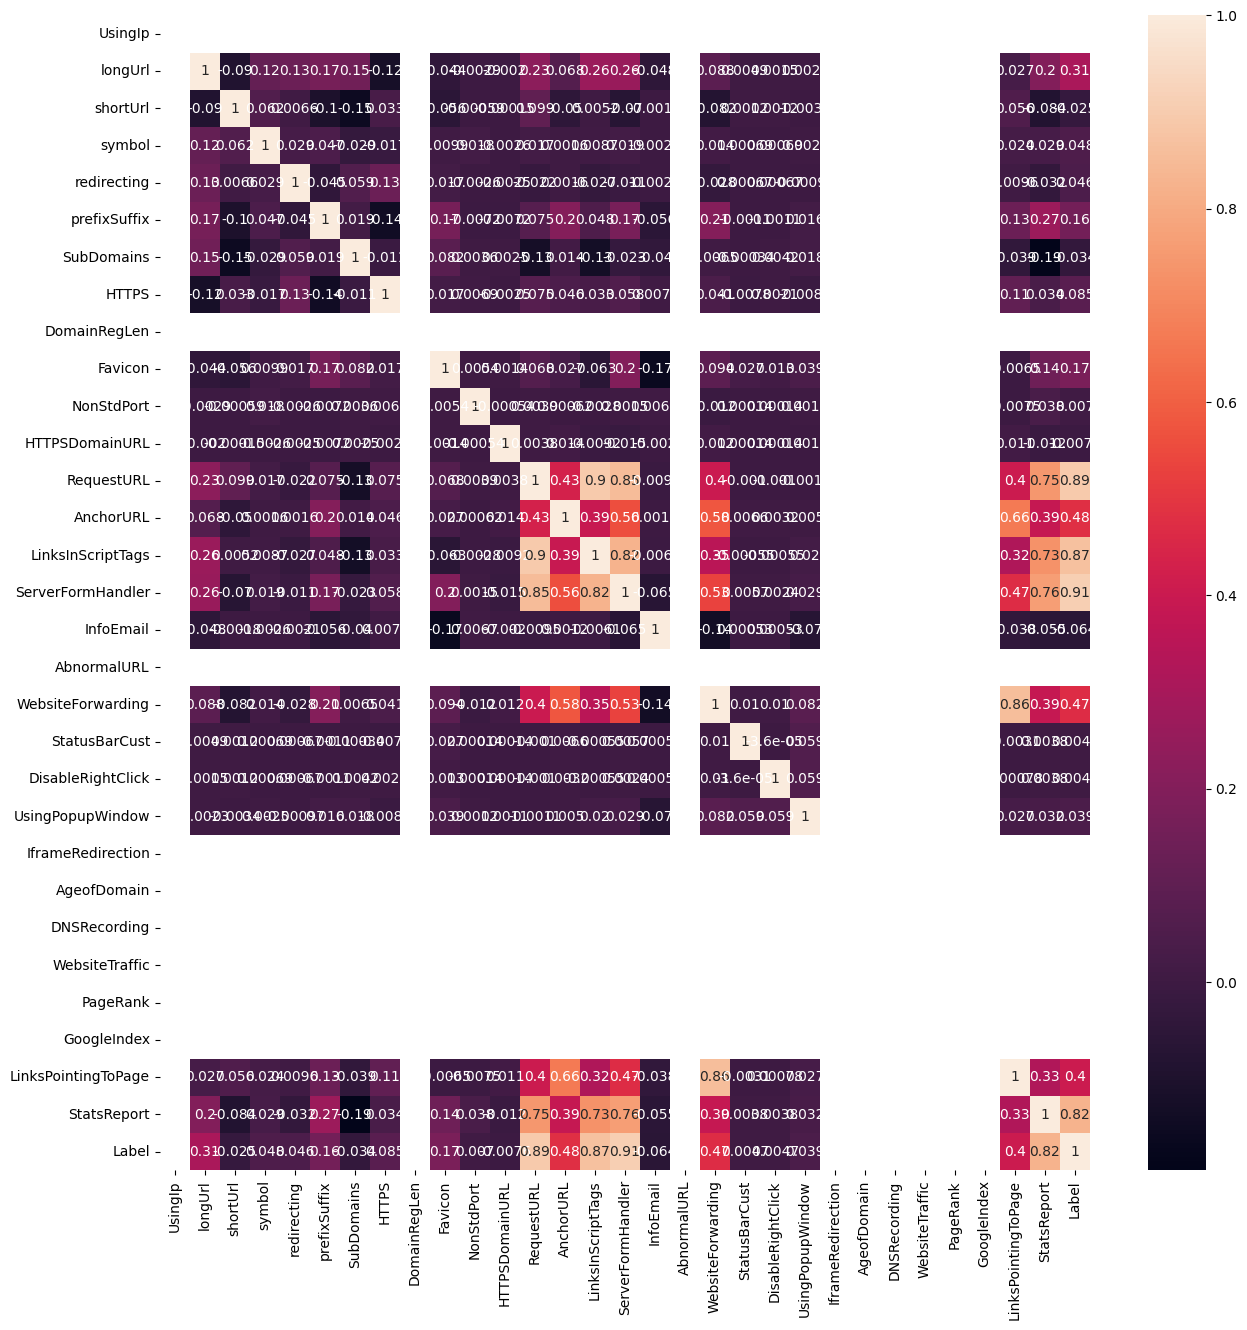

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

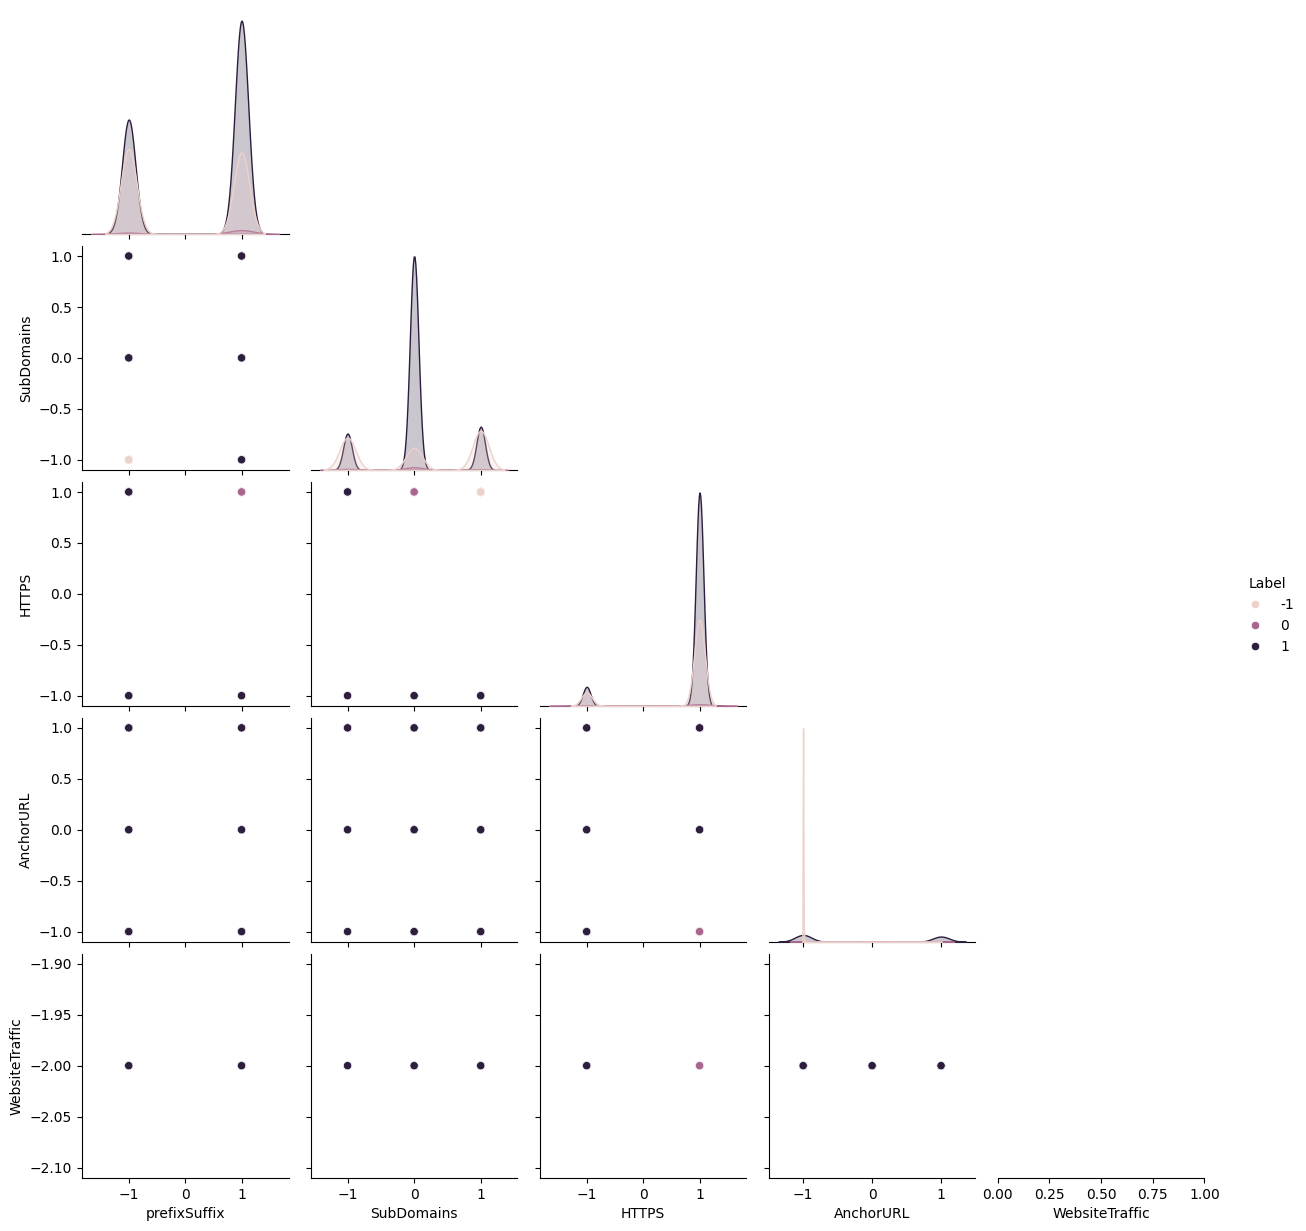

In [11]:
#pairplot for particular features

df = data[['prefixSuffix', 'SubDomains', 'HTTPS','AnchorURL','WebsiteTraffic','Label']]
sns.pairplot(data = df,hue="Label",corner=True);

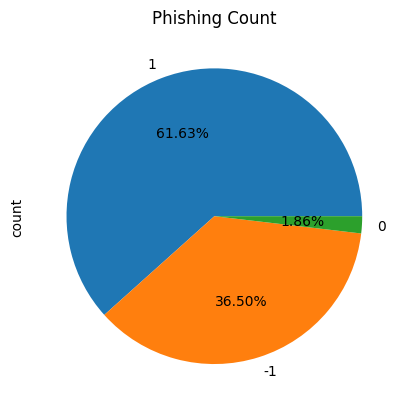

In [12]:
# Phishing Count in pie chart

data['Label'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

In [13]:
# Splitting the dataset into dependant and independant fetature
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((54807, 30), (54807,))

In [14]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((43845, 30), (43845,), (10962, 30), (10962,))

In [15]:
# Creating holders to store the model performance results
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))

In [16]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=10)

# fit the model 
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [17]:
#predicting the target value from the model for the samples
y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

In [18]:
import numpy as np
from sklearn import metrics

# Skip zeros
train_mask = y_train != 0
test_mask  = y_test != 0

# Masked arrays
y_train_masked = y_train[train_mask]
y_train_masked = np.where(y_train_masked == -1, 0, y_train_masked)  # -1 -> 0
y_train_pred_masked = y_train_forest[train_mask]
y_train_pred_masked = np.where(y_train_pred_masked == -1, 0, y_train_pred_masked)

y_test_masked = y_test[test_mask]
y_test_masked = np.where(y_test_masked == -1, 0, y_test_masked)
y_test_pred_masked = y_test_forest[test_mask]
y_test_pred_masked = np.where(y_test_pred_masked == -1, 0, y_test_pred_masked)

# Accuracy
acc_train_forest = metrics.accuracy_score(y_train_masked, y_train_pred_masked)
acc_test_forest  = metrics.accuracy_score(y_test_masked, y_test_pred_masked)
print(f"Random Forest: Accuracy on training Data: {acc_train_forest:.3f}")
print(f"Random Forest: Accuracy on test Data: {acc_test_forest:.3f}\n")

# F1 Score
f1_train_forest = metrics.f1_score(y_train_masked, y_train_pred_masked, average='binary')
f1_test_forest  = metrics.f1_score(y_test_masked, y_test_pred_masked, average='binary')
print(f"Random Forest: F1 score on training Data: {f1_train_forest:.3f}")
print(f"Random Forest: F1 score on test Data: {f1_test_forest:.3f}\n")

# Recall
recall_train_forest = metrics.recall_score(y_train_masked, y_train_pred_masked, average='binary')
recall_test_forest  = metrics.recall_score(y_test_masked, y_test_pred_masked, average='binary')
print(f"Random Forest: Recall on training Data: {recall_train_forest:.3f}")
print(f"Random Forest: Recall on test Data: {recall_test_forest:.3f}\n")

# Precision
precision_train_forest = metrics.precision_score(y_train_masked, y_train_pred_masked, average='binary')
precision_test_forest  = metrics.precision_score(y_test_masked, y_test_pred_masked, average='binary')
print(f"Random Forest: Precision on training Data: {precision_train_forest:.3f}")
print(f"Random Forest: Precision on test Data: {precision_test_forest:.3f}")


Random Forest: Accuracy on training Data: 1.000
Random Forest: Accuracy on test Data: 1.000

Random Forest: F1 score on training Data: 1.000
Random Forest: F1 score on test Data: 1.000

Random Forest: Recall on training Data: 1.000
Random Forest: Recall on test Data: 1.000

Random Forest: Precision on training Data: 1.000
Random Forest: Precision on test Data: 0.999


In [19]:
print(metrics.classification_report(y_test, y_test_forest))


              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      3993
           0       1.00      0.98      0.99       205
           1       1.00      1.00      1.00      6764

    accuracy                           1.00     10962
   macro avg       1.00      0.99      1.00     10962
weighted avg       1.00      1.00      1.00     10962



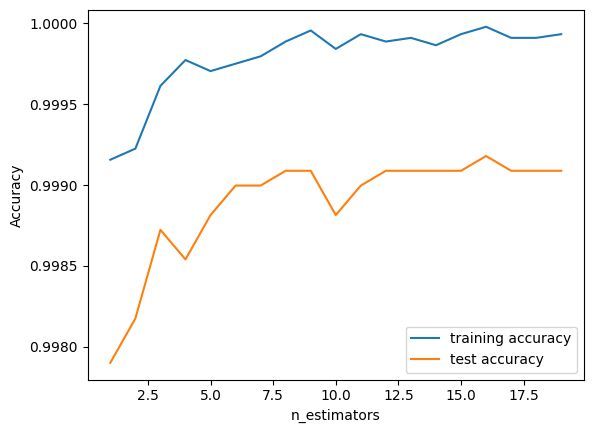

In [20]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    forest_test =  RandomForestClassifier(n_estimators=n)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend();


In [21]:


results_df = pd.DataFrame({
    'Model': ['Random Forest'],
    'Accuracy': [acc_test_forest],
    'F1_Score': [f1_test_forest],
    'Recall': [recall_test_forest],
    'Precision': [precision_test_forest]
})

results_df


,Model,Accuracy,F1_Score,Recall,Precision
0,Random Forest,0.999535,0.99963,0.999852,0.999409


In [22]:
# Gradient Boosting Classifier Model
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [23]:
#predicting the target value from the model for the samples
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

In [24]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc,average='macro')
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc,average='macro')
print("Gradient Boosting Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boosting Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(y_train,y_train_gbc,average='macro')
recall_score_test_gbc =  metrics.recall_score(y_test,y_test_gbc,average='macro')
print("Gradient Boosting Classifier : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("Gradient Boosting Classifier : Recall on test Data: {:.3f}".format(recall_score_test_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc,average='macro')
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc,average='macro')
print("Gradient Boosting Classifier : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("Gradient Boosting Classifier : precision on test Data: {:.3f}".format(precision_score_test_gbc))

Gradient Boosting Classifier : Accuracy on training Data: 1.000
Gradient Boosting Classifier : Accuracy on test Data: 0.999

Gradient Boosting Classifier : f1_score on training Data: 0.996
Gradient Boosting Classifier : f1_score on test Data: 0.991

Gradient Boosting Classifier : Recall on training Data: 0.997
Gradient Boosting Classifier : Recall on test Data: 0.993

Gradient Boosting Classifier : precision on training Data: 0.995
Gradient Boosting Classifier : precision on test Data: 0.988


In [25]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_gbc))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      3993
           0       0.97      0.98      0.97       205
           1       1.00      1.00      1.00      6764

    accuracy                           1.00     10962
   macro avg       0.99      0.99      0.99     10962
weighted avg       1.00      1.00      1.00     10962



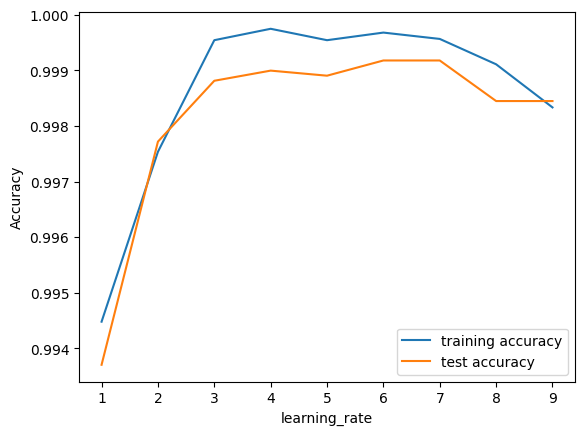

In [26]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  GradientBoostingClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

In [27]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Gradient Boosting Classifier',acc_test_gbc,f1_score_test_gbc,
             recall_score_train_gbc,precision_score_train_gbc)

In [28]:
results_df = pd.DataFrame({
    'Model': ['Gradient Boosting Classifier'],
    'Accuracy': [acc_test_gbc],
    'F1_Score': [f1_score_test_gbc],
    'Recall': [recall_score_test_gbc],
    'Precision': [precision_score_test_gbc]
})

results_df


,Model,Accuracy,F1_Score,Recall,Precision
0,Gradient Boosting Classifier,0.998723,0.990583,0.992832,0.988369


In [29]:
import pandas as pd

# Example DataFrames (replace with your actual variables)
results_gbc = pd.DataFrame({
    'Model': ['Gradient Boosting Classifier'],
    'Accuracy': [acc_test_gbc],
    'F1_Score': [f1_score_test_gbc],
    'Recall': [recall_score_test_gbc],
    'Precision': [precision_score_test_gbc]
})

results_rf = pd.DataFrame({
    'Model': ['Random Forest'],
    'Accuracy': [acc_test_forest],
    'F1_Score': [f1_test_forest],
    'Recall': [recall_test_forest],
    'Precision': [precision_test_forest]
})

# Combine
results_df = pd.concat([results_rf, results_gbc], ignore_index=True)
print(results_df)


                          Model  Accuracy  F1_Score    Recall  Precision
0                 Random Forest  0.999535  0.999630  0.999852   0.999409
1  Gradient Boosting Classifier  0.998723  0.990583  0.992832   0.988369


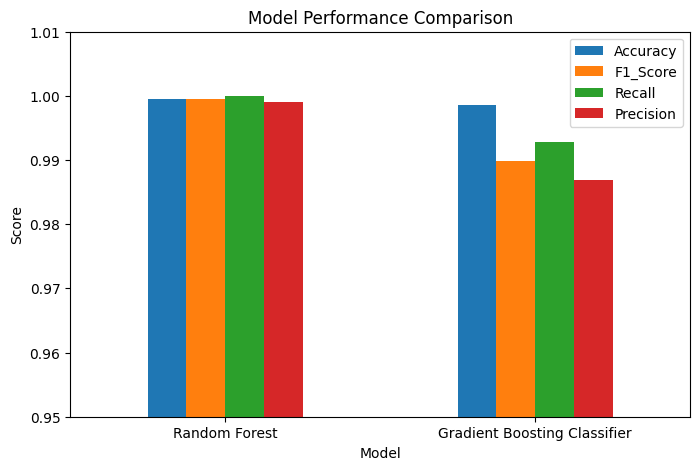

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# DataFrame with your metrics
results_df = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting Classifier'],
    'Accuracy': [0.999442, 0.998632],
    'F1_Score': [0.999557, 0.989775],
    'Recall': [1.000000, 0.992783],
    'Precision': [0.999114, 0.986827]
})

results_df.set_index('Model', inplace=True)

# Plot all metrics
results_df.plot(kind='bar', figsize=(8,5))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0.95, 1.01)
plt.xticks(rotation=0)
plt.show()


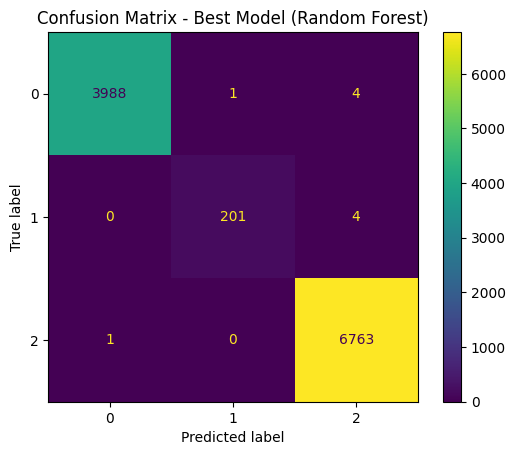

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix – Random Forest (Best Model)
cm_rf = confusion_matrix(y_test, y_test_forest)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot()
plt.title("Confusion Matrix - Best Model (Random Forest)")
plt.show()

In [32]:
import pickle

# Suppose your trained RF model is stored in variable: rf_model
pickle.dump(forest, open("random_forest_model.pkl", "wb"))
print("Random Forest Model saved successfully!")


Random Forest Model saved successfully!


In [1]:
!pip install beautifulsoup4
!pip install requests
!pip install tqdm


In [2]:
import pickle
from feature import FeatureExtraction
import numpy as np

# Load stored Random Forest Model
rf = pickle.load(open("random_forest_model.pkl", "rb"))

# Example URL for testing
url = "http://8csdg3iejj.lilagoraj.pl/"  # Replace with any URL
obj = FeatureExtraction(url)
x = np.array(obj.getFeaturesList()).reshape(1, 30)

# Get probabilities
y_pro_phishing = rf.predict_proba(x)[0, 0]
y_pro_non_phishing = rf.predict_proba(x)[0, 1]
print("Feature Array:", x)
print("Phishing Probability:", y_pro_phishing)
print("Non-Phishing Probability:", y_pro_non_phishing)

# Final Prediction
y_pred = rf.predict(x)[0]
print("Prediction =", y_pred)

if y_pred == 1:
    print("It is a safe website")
else:
    print("Caution! Suspicious website detected")


Feature Array: [[ 1  1  1  1  1  1  0 -1 -2 -1  1  1 -1 -1 -1 -1  1 -2 -1 -1 -1 -1 -1 -2
  -2 -2 -2 -2 -1 -1]]
Phishing Probability: 1.0
Non-Phishing Probability: 0.0
Prediction = -1
Caution! Suspicious website detected


e:\github\PhishGuardAI\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
e:\github\PhishGuardAI\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
e:\github\PhishGuardAI\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
